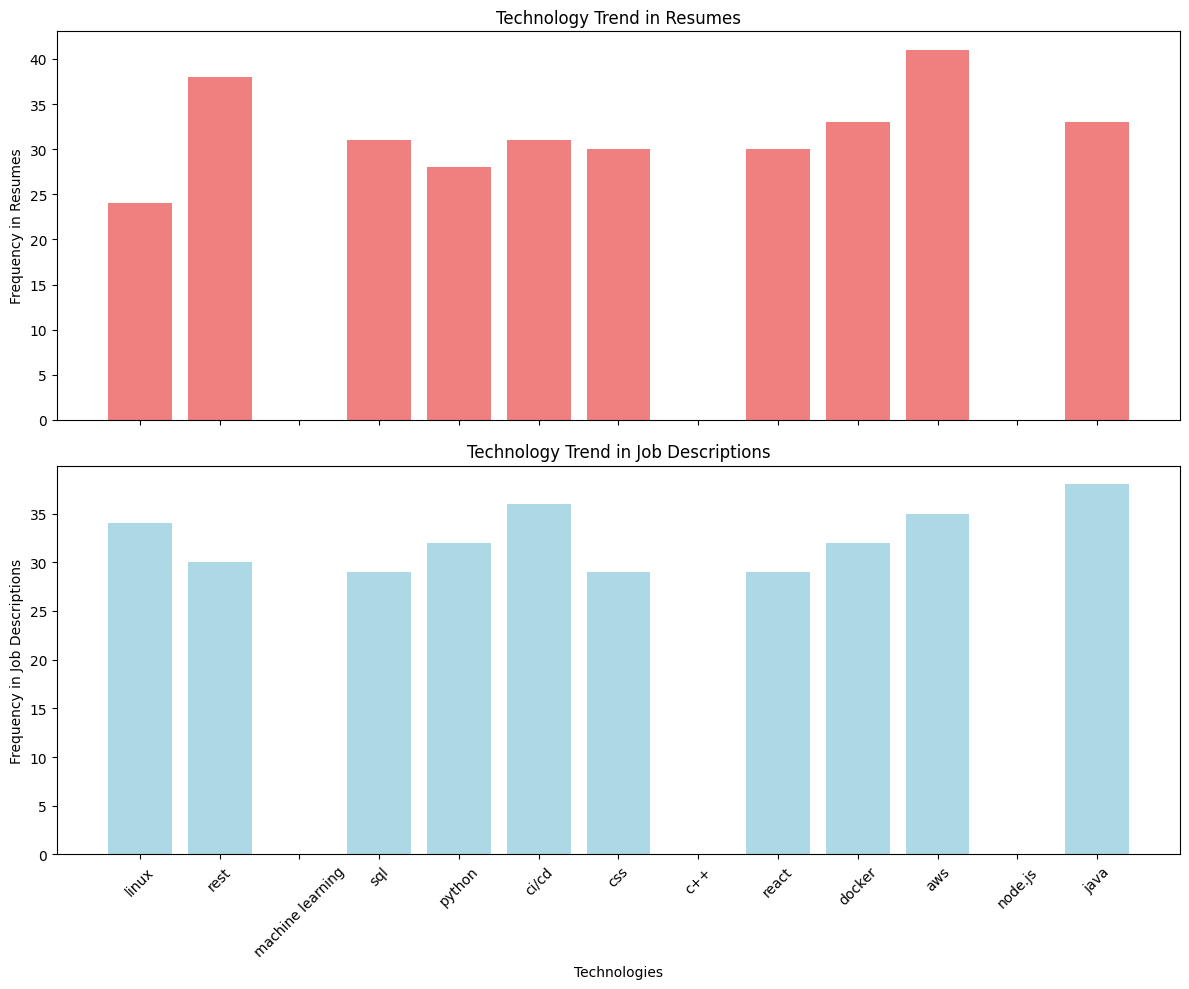

Bar graphs displaying technology trends in resumes and job descriptions have been generated.


In [2]:
from sentence_transformers import SentenceTransformer, util
import pandas as pd
import re
import matplotlib.pyplot as plt

# Load the SBERT model for sentence similarity
model = SentenceTransformer('paraphrase-MiniLM-L6-v2')  # Lightweight and effective SBERT model

# Predefined set of keywords for common skills/topics
skill_keywords = {
    "python", "node.js", "rest", "docker", "aws", "c++", "react", "css", "ci/cd", "machine learning", "sql", "java", "linux"
}

# Function to clean and extract keywords from text
def extract_keywords(text):
    text = text.lower()
    special_cases = {"c++", "node.js", "ci/cd"}
    extracted_keywords = set()
    words = re.findall(r'\b[\w\+\-/]+\b', text)
    for word in words:
        if word in skill_keywords or word in special_cases:
            extracted_keywords.add(word)
    return extracted_keywords

# Load input CSV file
input_file_path = "jd-resume_input-clean.csv"  # Update with your actual file path
df = pd.read_csv(input_file_path)

# Skill Level Analysis for Resumes (Column 2) and Job Descriptions (Column 3)
resume_skill_counts = {skill: 0 for skill in skill_keywords}
job_desc_skill_counts = {skill: 0 for skill in skill_keywords}

# Count skills in resumes
for resume in df["resume"]:  # Assuming resumes are in the "resume" column
    resume_keywords = extract_keywords(resume)
    for skill in resume_keywords:
        resume_skill_counts[skill] += 1

# Count skills in job descriptions
for job_desc in df["job_description"]:  # Assuming job descriptions are in the "job_description" column
    job_desc_keywords = extract_keywords(job_desc)
    for skill in job_desc_keywords:
        job_desc_skill_counts[skill] += 1

# Plotting the skill levels as bar graphs
fig, axes = plt.subplots(2, 1, figsize=(12, 10), sharex=True)

# Bar chart for skills in resumes
axes[0].bar(resume_skill_counts.keys(), resume_skill_counts.values(), color="lightcoral")
axes[0].set_ylabel('Frequency in Resumes')
axes[0].set_title('Technology Trend in Resumes')

# Bar chart for skills in job descriptions
axes[1].bar(job_desc_skill_counts.keys(), job_desc_skill_counts.values(), color="lightblue")
axes[1].set_xlabel('Technologies')
axes[1].set_ylabel('Frequency in Job Descriptions')
axes[1].set_title('Technology Trend in Job Descriptions')

plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

print("Bar graphs displaying technology trends in resumes and job descriptions have been generated.")
